<a href="https://colab.research.google.com/github/programminghunk/sugarcane/blob/main/our_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA Loading

In [1]:
!pip install opencv-python
!pip install opencv-python-headless
!pip install matplotlib
!pip install scikit-learn
!pip install scikit-image
!pip install -U scikit-image
!pip install tensorflow_io

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 65.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.23.2
    Uninstalling scikit-image-0.23.2:
      Successfully uninstalled scikit-image-0.23.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 13.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras import layers
# import tensorflow_addons as tfa
# import pandas as pd
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import StratifiedKFold
# import albumentations as A
from tqdm import tqdm
import tensorflow.keras.layers as L
import glob, random, os, warnings
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose
from tensorflow.keras.layers import concatenate, Conv2D,Dense, Concatenate, Input
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, DepthwiseConv2D
from tensorflow.keras.layers import Conv2D, BatchNormalization
from tensorflow.keras.layers import ReLU, AvgPool2D, Flatten, Dense#,sigmoid
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras import activations
from keras.models import *
from keras.layers import *
import keras.backend as K
from keras.callbacks import ModelCheckpoint, EarlyStopping
# import seaborn as sns
from tqdm import tqdm
import os
import cv2
from cv2 import imread
import numpy as np
import matplotlib.pyplot as plt
# import pywt
# import pywt.data
# from morpholayers import *
# from morpholayers.layers import Dilation2D,Erosion2D,Closing2D,Opening2D,reconstruction_dilation
import time
import gc
import random
from glob import glob
# import tensorflow_wavelets.Layers.DWT as DWT
# import tensorflow_wavelets.Layers.DTCWT as DTCWT
# import tensorflow_wavelets.Layers.DMWT as DMWT

# Custom Activation function Layer
# import tensorflow_wavelets.Layers.Threshold as Threshold
# from matplotlib import pylab as plt
# from osgeo import gdal
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib.colors import LinearSegmentedColormap
# import tensorflow_io as tfio
from tensorflow.keras.losses import binary_crossentropy,mse
from tensorflow.keras.layers import ZeroPadding2D, Concatenate,Add,SpatialDropout2D,Conv2D

# roc_auc_score

# print(tf.__version__)

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models

def Conv(x, filters, kernel_size, strides):
    x = layers.Conv2D(filters, kernel_size, strides=strides, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    return x

def C2f(x, filters, use_residual=True):
    for _ in range(3):  # 3 repeats
        y = layers.Conv2D(filters, 3, padding='same')(x)
        y = layers.BatchNormalization()(y)
        y = layers.ReLU()(y)
        if use_residual:
            x = layers.Add()([x, y])
        else:
            x = y
    return x

def SPPF(x, filters, pool_size):
    y1 = layers.MaxPooling2D(pool_size=pool_size, strides=1, padding='same')(x)
    y2 = layers.MaxPooling2D(pool_size=pool_size, strides=1, padding='same')(x)
    y3 = layers.MaxPooling2D(pool_size=pool_size, strides=1, padding='same')(x)
    x = layers.Concatenate()([x, y1, y2, y3])
    x = layers.Conv2D(filters, 1, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    return x

def tinier_yolo(input_size=(640, 640, 3)):
    inputs = layers.Input(input_size)
    x = inputs

    # Layer configurations
    layers_config = [
        [-1, 1, 'Conv', [64, 3, 2]],
        [-1, 1, 'Conv', [128, 3, 2]],
        [-1, 3, 'C2f', [128, True]],
        [-1, 1, 'Conv', [256, 3, 2]],
        [-1, 6, 'C2f', [256, True]],
        [-1, 1, 'Conv', [512, 3, 2]],
        [-1, 6, 'C2f', [512, True]],
        [-1, 1, 'Conv', [1024, 3, 2]],
        [-1, 3, 'C2f', [1024, True]],
        [-1, 1, 'SPPF', [1024, 5]]
    ]

    for layer in layers_config:
        from_idx, repeats, module, args = layer
        for _ in range(repeats):
            if module == 'Conv':
                x = Conv(x, *args)
            elif module == 'C2f':
                x = C2f(x, *args)
            elif module == 'SPPF':
                x = SPPF(x, *args)

    model = models.Model(inputs, x)
    return model

# Create the model
model = tinier_yolo()
#model.summary()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def unet_model(input_size=(640, 640, 3)):
    inputs = layers.Input(input_size)

#Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = models.Model(inputs=[inputs], outputs=[outputs])

    return model

model = unet_model()


In [15]:
import tensorflow as tf

tf.keras.utils.plot_model(
    model,
    # to_file='/content/drive/MyDrive/copy_move/model1.png',
    show_shapes=True,
    show_layer_names=True)

In [13]:
#!pip install visualkeras

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


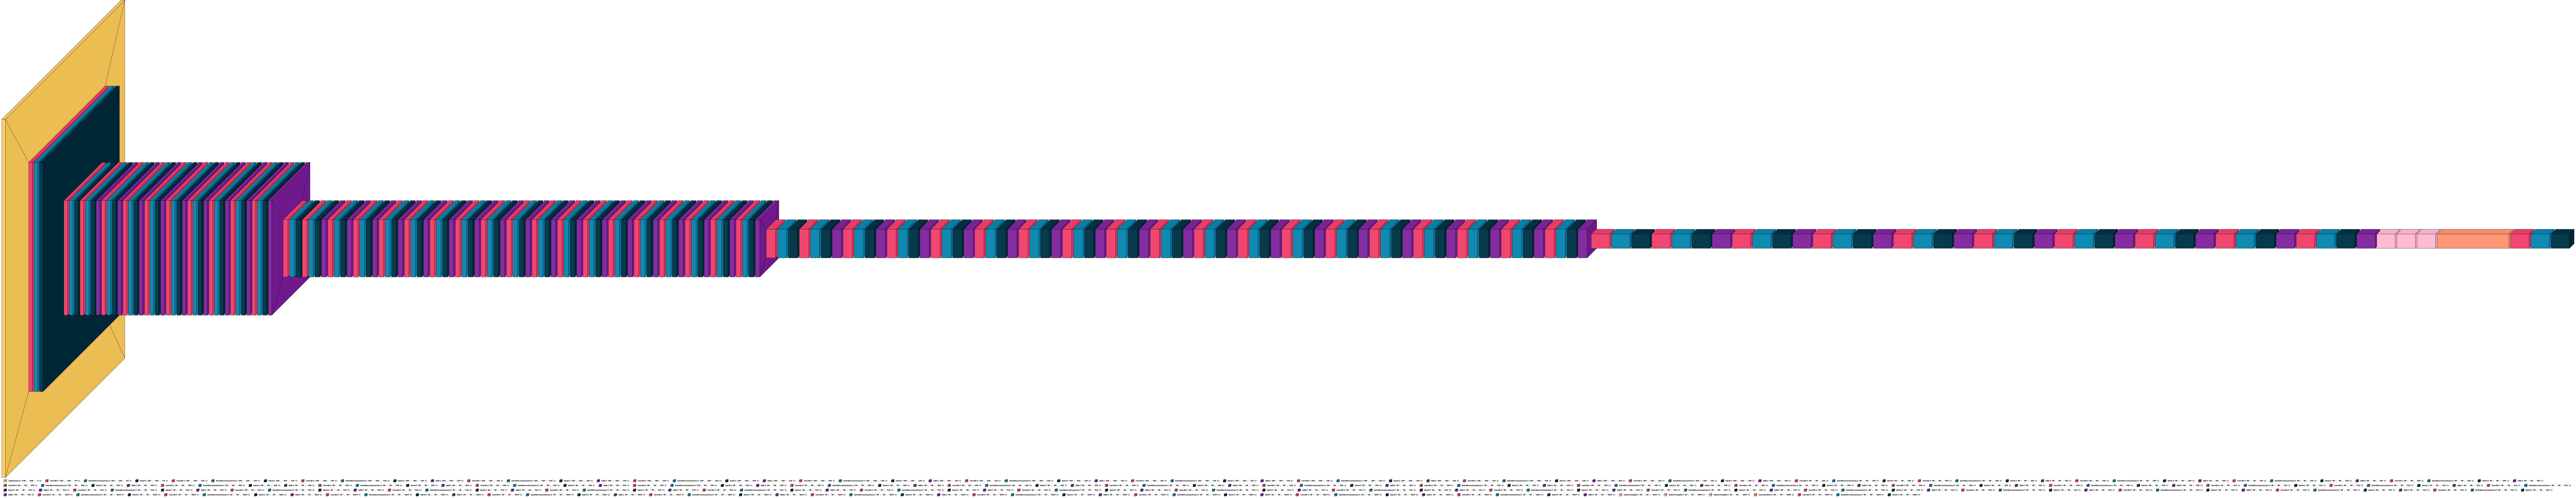

In [27]:
import visualkeras
from tensorflow.keras import layers
from PIL import ImageFont
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D
from collections import defaultdict

color_map = defaultdict(dict)
color_map[SPPF]['fill'] = 'magenta'
color_map[Conv]['fill'] = 'blue'
color_map[C2f]['fill'] = 'green'
color_map[ZeroPadding2D]['fill'] = 'gray'
color_map[Dropout]['fill'] = 'pink'
color_map[MaxPooling2D]['fill'] = 'red'
color_map[Dense]['fill'] = 'olive'
color_map[Flatten]['fill'] = 'teal'

visualkeras.layered_view(model,legend=True, show_dimension=True, color_map=color_map)

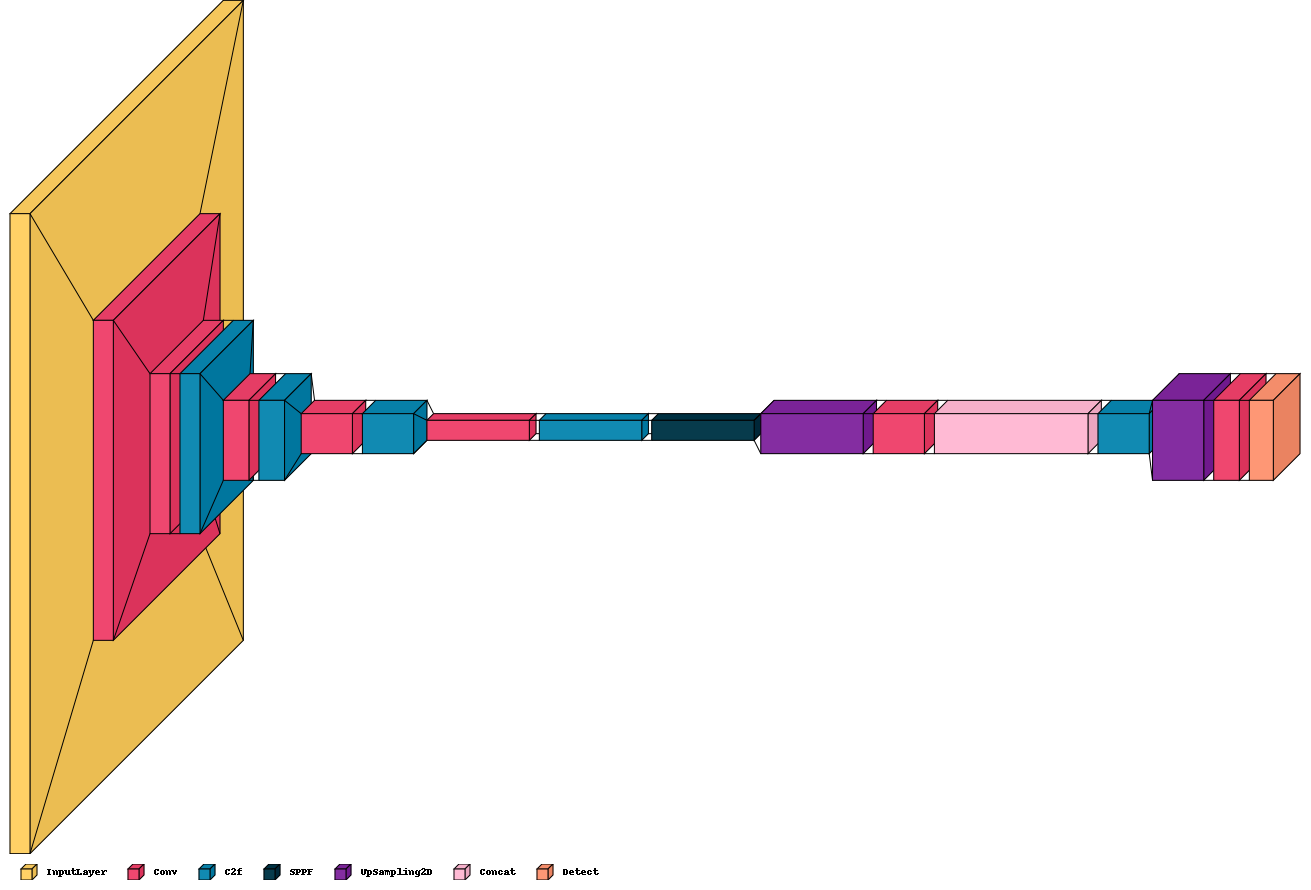

In [62]:
import tensorflow as tf
from tensorflow.keras import layers, models
import visualkeras

class Conv(layers.Layer):
    def __init__(self, out_channels, kernel_size, stride):
        super(Conv, self).__init__()
        self.conv = layers.Conv2D(out_channels, kernel_size, stride, padding='same')
        self.bn = layers.BatchNormalization()
        self.act = layers.ReLU()

    def call(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.act(x)
        return x

class C2f(layers.Layer):
    def __init__(self, out_channels, shortcut=True):
        super(C2f, self).__init__()
        self.conv1 = Conv(out_channels, 1, 1)
        self.conv2 = Conv(out_channels, 1, 1)
        self.conv3 = Conv(out_channels, 3, 1)
        self.shortcut = shortcut

    def call(self, x):
        x1 = self.conv1(x)
        x2 = self.conv2(x)
        x = self.conv3(tf.concat([x1, x2], axis=-1))
        return x + x1 if self.shortcut else x

class SPPF(layers.Layer):
    def __init__(self, out_channels, pool_size):
        super(SPPF, self).__init__()
        self.conv = Conv(out_channels, 1, 1)
        self.pool = layers.MaxPooling2D(pool_size, strides=1, padding='same')

    def call(self, x):
        x1 = self.pool(x)
        x2 = self.pool(x1)
        x3 = self.pool(x2)
        return self.conv(tf.concat([x, x1, x2, x3], axis=-1))

class Concat(layers.Layer):
    def __init__(self, axis):
        super(Concat, self).__init__()
        self.axis = axis

    def call(self, inputs):
        return tf.concat(inputs, axis=self.axis)

    def compute_output_shape(self, input_shape):
        input_shape = [list(shape) for shape in input_shape]
        output_shape = input_shape[0]
        for shape in input_shape[1:]:
            output_shape[self.axis] += shape[self.axis]
        return tuple(output_shape)

class Detect(layers.Layer):
    def __init__(self, num_classes):
        super(Detect, self).__init__()
        self.num_classes = num_classes

    def call(self, inputs):
        outputs = [layers.Conv2D(self.num_classes, 1)(x) for x in inputs]
        return tf.concat(outputs, axis=-1)

    def compute_output_shape(self, input_shape):
        input_shapes = [shape for shape in input_shape]
        output_shape = list(input_shapes[0])
        output_shape[-1] = self.num_classes * len(input_shapes)
        return tuple(output_shape)

def yolov8(input_size=(640, 640, 3), nc=80):
    inputs = layers.Input(input_size)

    # Backbone
    x = Conv(64, 3, 2)(inputs)
    x = Conv(128, 3, 2)(x)
    x = C2f(128, True)(x)
    x = Conv(256, 3, 2)(x)
    x = C2f(256, True)(x)
    x = Conv(512, 3, 2)(x)
    x = C2f(512, True)(x)
    x = Conv(1024, 3, 2)(x)
    x = C2f(1024, True)(x)
    x = SPPF(1024, 5)(x)

    # Head
    p5 = layers.UpSampling2D(size=(2, 2), interpolation='nearest')(x)
    p4 = Conv(512, 1, 1)(p5)
    x = Concat(axis=-1)([p5, p4])
    x = C2f(512, True)(x)

    p4 = layers.UpSampling2D(size=(2, 2), interpolation='nearest')(x)
    p3 = Conv(256, 1, 1)(p4)
    x = Concat(axis=-1)([p4, p3])
    x = C2f(256, True)(x)

    x = Conv(256, 3, 2)(x)
    x = Concat(axis=-1)([x, p4])
    x = C2f(512, True)(x)

    x = Conv(512, 3, 2)(x)
    x = Concat(axis=-1)([x, p5])
    x = C2f(1024, True)(x)

    outputs = Detect(nc)([p3, p4, p5])

    model = models.Model(inputs, outputs)
    return model

# Create an instance of the model
model = yolov8()

# Visualize the model using visualkeras
visualkeras.layered_view(model, scale_xy=1, legend=True)


In [53]:
#model.summary()

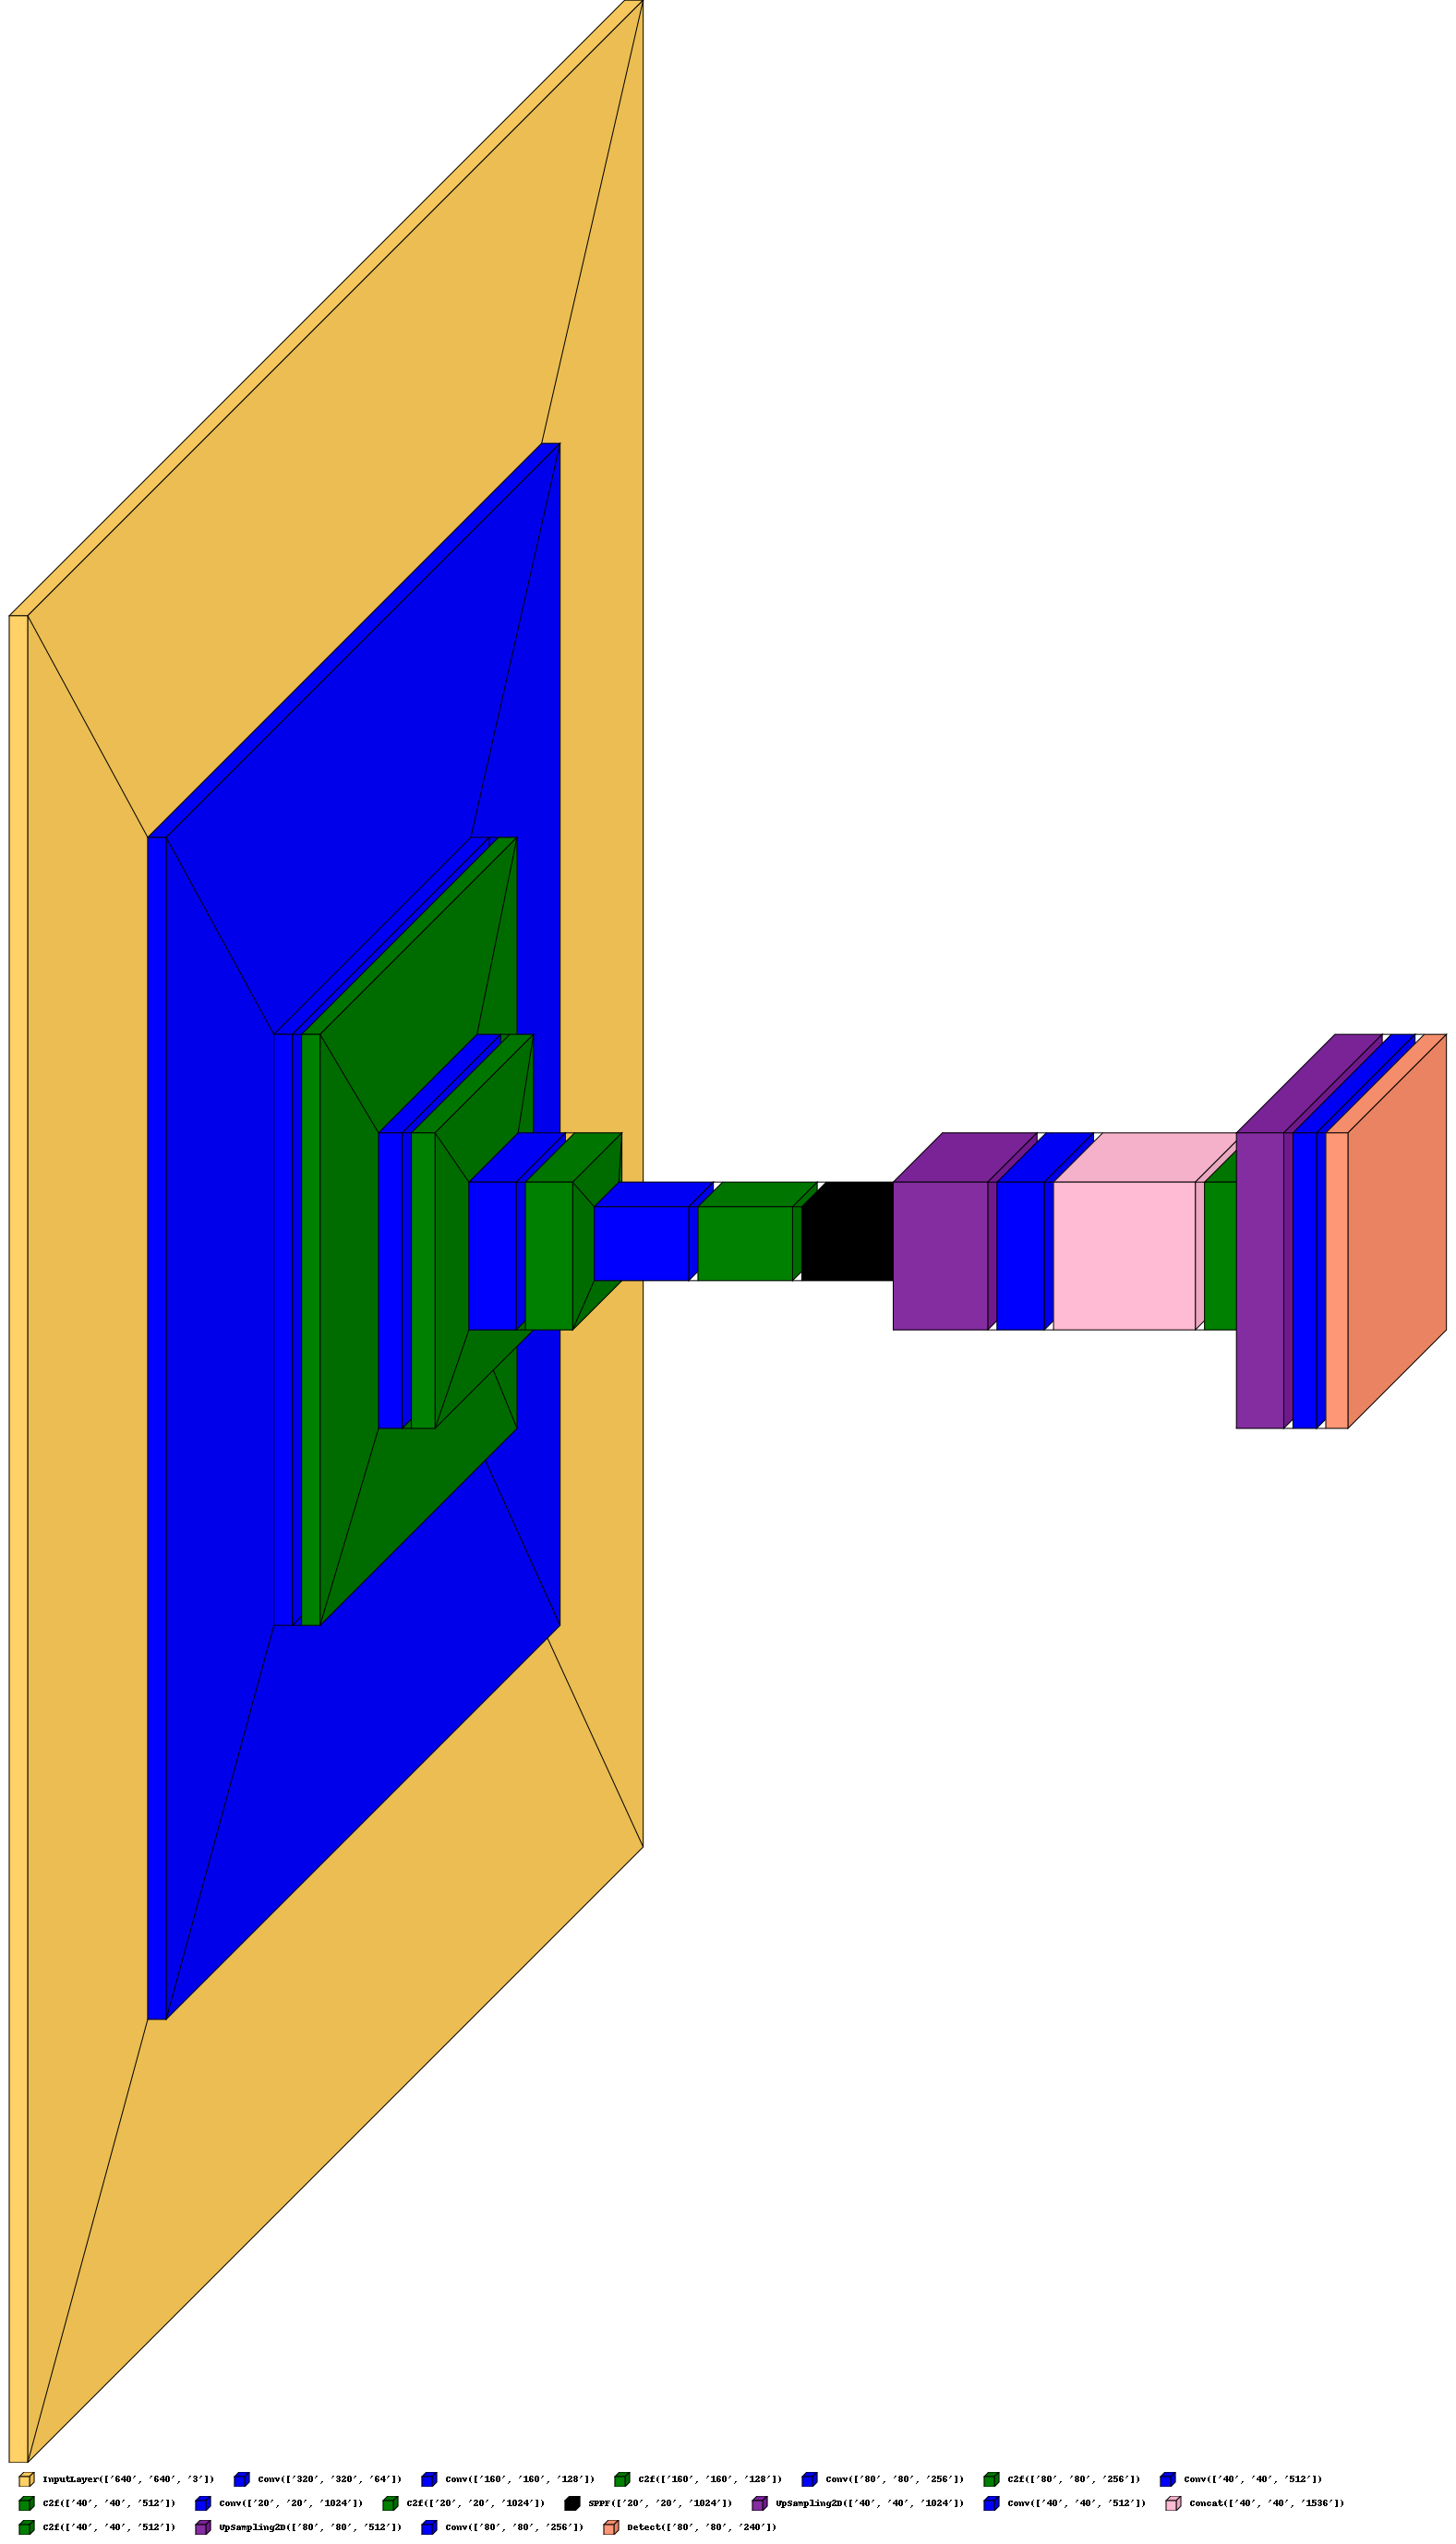

In [55]:
import visualkeras
from tensorflow.keras import layers
from PIL import ImageFont
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D
from collections import defaultdict

color_map = defaultdict(dict)
color_map[SPPF]['fill'] = 'black'
color_map[Conv]['fill'] = 'blue'
color_map[C2f]['fill'] = 'green'
color_map[ZeroPadding2D]['fill'] = 'gray'
color_map[Dropout]['fill'] = 'pink'
color_map[MaxPooling2D]['fill'] = 'red'
color_map[Dense]['fill'] = 'cyan'
color_map[Flatten]['fill'] = 'teal'

visualkeras.layered_view(model,legend=True, show_dimension=True, color_map=color_map)

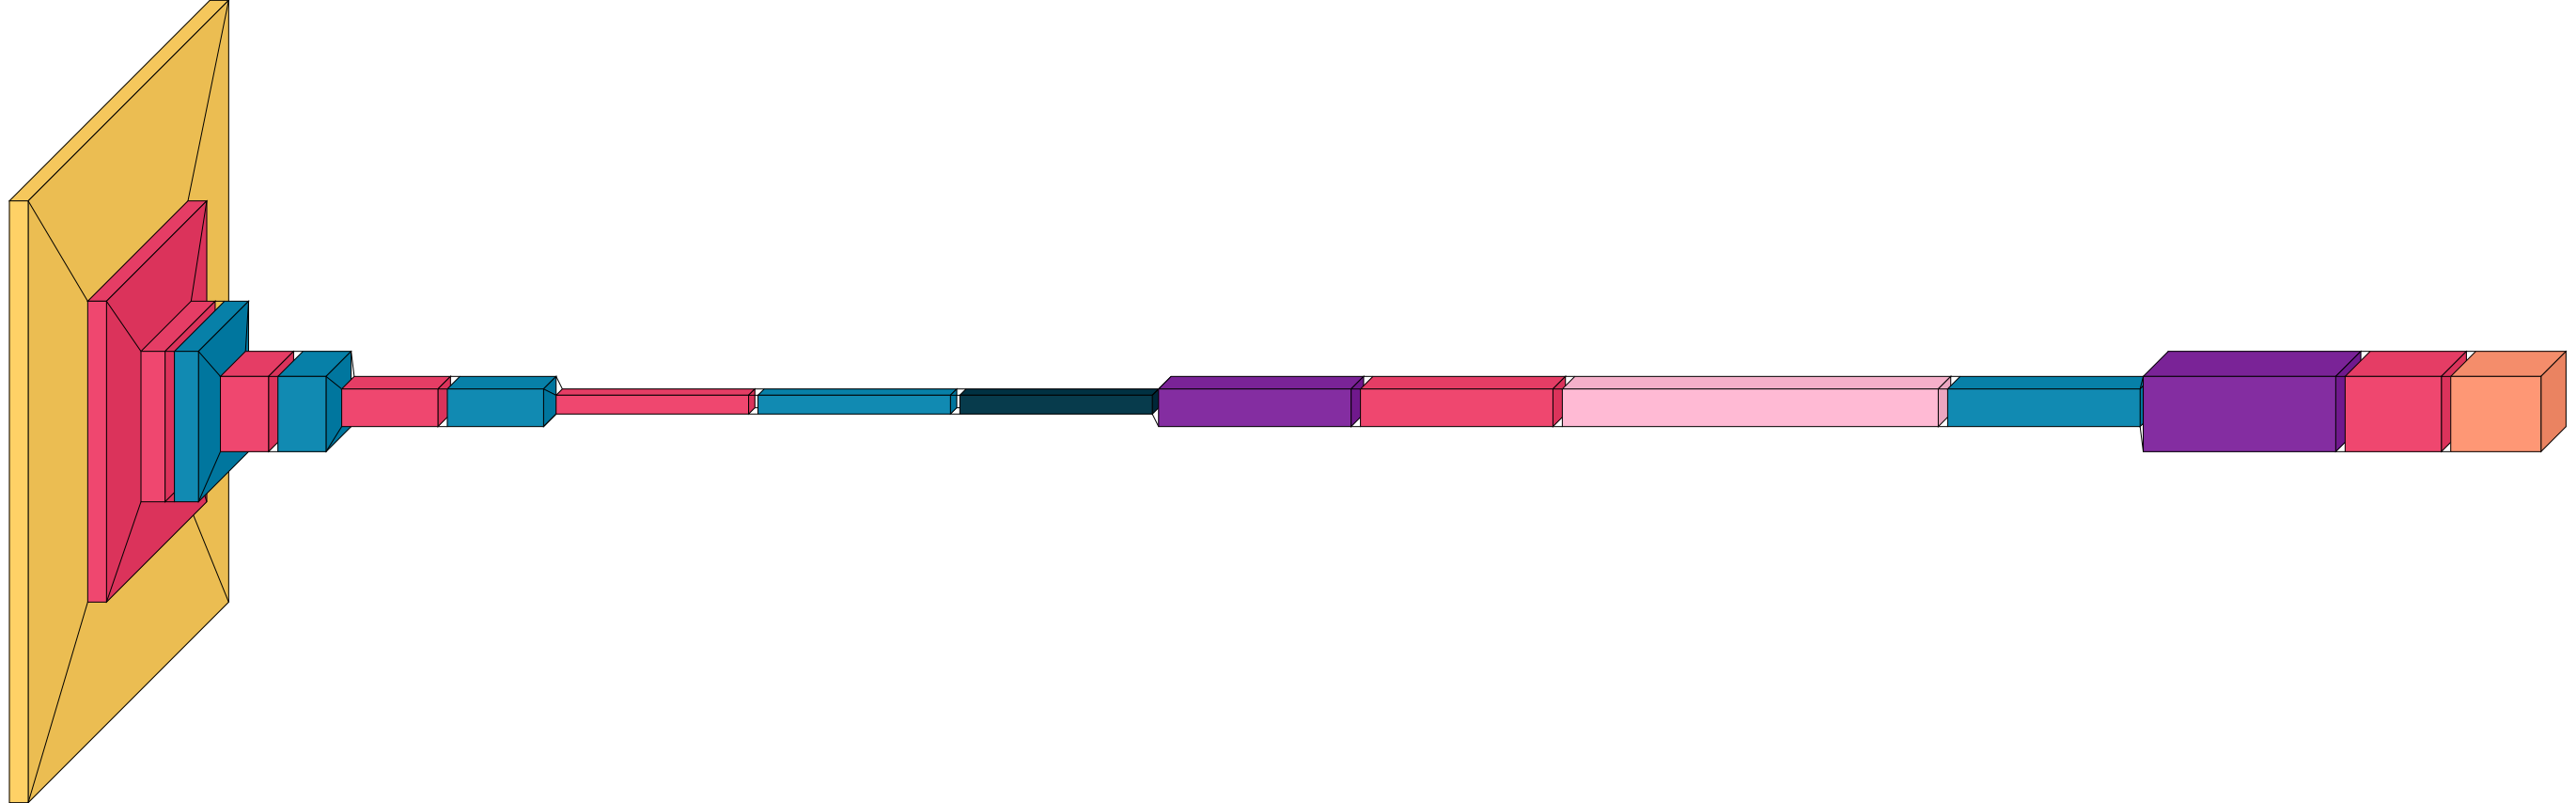

In [58]:
import tensorflow as tf
from tensorflow.keras import layers, models
import visualkeras

class Conv(layers.Layer):
    def __init__(self, out_channels, kernel_size, stride):
        super(Conv, self).__init__()
        self.conv = layers.Conv2D(out_channels, kernel_size, stride, padding='same')
        self.bn = layers.BatchNormalization()
        self.act = layers.ReLU()

    def call(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.act(x)
        return x

class C2f(layers.Layer):
    def __init__(self, out_channels, shortcut=True):
        super(C2f, self).__init__()
        self.conv1 = Conv(out_channels, 1, 1)
        self.conv2 = Conv(out_channels, 1, 1)
        self.conv3 = Conv(out_channels, 3, 1)
        self.shortcut = shortcut

    def call(self, x):
        x1 = self.conv1(x)
        x2 = self.conv2(x)
        x = self.conv3(tf.concat([x1, x2], axis=-1))
        return x + x1 if self.shortcut else x

class SPPF(layers.Layer):
    def __init__(self, out_channels, pool_size):
        super(SPPF, self).__init__()
        self.conv = Conv(out_channels, 1, 1)
        self.pool = layers.MaxPooling2D(pool_size, strides=1, padding='same')

    def call(self, x):
        x1 = self.pool(x)
        x2 = self.pool(x1)
        x3 = self.pool(x2)
        return self.conv(tf.concat([x, x1, x2, x3], axis=-1))

class Concat(layers.Layer):
    def __init__(self, axis):
        super(Concat, self).__init__()
        self.axis = axis

    def call(self, inputs):
        return tf.concat(inputs, axis=self.axis)

    def compute_output_shape(self, input_shape):
        input_shape = [list(shape) for shape in input_shape]
        output_shape = input_shape[0]
        for shape in input_shape[1:]:
            output_shape[self.axis] += shape[self.axis]
        return tuple(output_shape)

class Detect(layers.Layer):
    def __init__(self, num_classes):
        super(Detect, self).__init__()
        self.num_classes = num_classes

    def call(self, inputs):
        outputs = [layers.Conv2D(self.num_classes, 1)(x) for x in inputs]
        return tf.concat(outputs, axis=-1)

    def compute_output_shape(self, input_shape):
        input_shapes = [shape for shape in input_shape]
        output_shape = list(input_shapes[0])
        output_shape[-1] = self.num_classes * len(input_shapes)
        return tuple(output_shape)

def yolov8_tinier(input_size=(640, 640, 3), nc=80):
    inputs = layers.Input(input_size)

    # Backbone
    x = Conv(32, 3, 2)(inputs)
    x = Conv(64, 3, 2)(x)
    x = C2f(64, True)(x)
    x = Conv(128, 3, 2)(x)
    x = C2f(128, True)(x)
    x = Conv(256, 3, 2)(x)
    x = C2f(256, True)(x)
    x = Conv(512, 3, 2)(x)
    x = C2f(512, True)(x)
    x = SPPF(512, 5)(x)

    # Head
    p5 = layers.UpSampling2D(size=(2, 2), interpolation='nearest')(x)
    p4 = Conv(512, 1, 1)(p5)
    x = Concat(axis=-1)([p5, p4])
    x = C2f(512, True)(x)

    p4 = layers.UpSampling2D(size=(2, 2), interpolation='nearest')(x)
    p3 = Conv(256, 1, 1)(p4)
    x = Concat(axis=-1)([p4, p3])
    x = C2f(256, True)(x)

    x = Conv(256, 3, 2)(x)
    x = Concat(axis=-1)([x, p4])
    x = C2f(512, True)(x)

    x = Conv(512, 3, 2)(x)
    x = Concat(axis=-1)([x, p5])
    x = C2f(1024, True)(x)

    outputs = Detect(nc)([p3, p4, p5])

    model = models.Model(inputs, outputs)
    return model

# Create an instance of the model
model = yolov8_tinier()
#model.summary()
# Visualize the model using visualkeras
visualkeras.layered_view(model, scale_xy=1, scale_z=0.4)


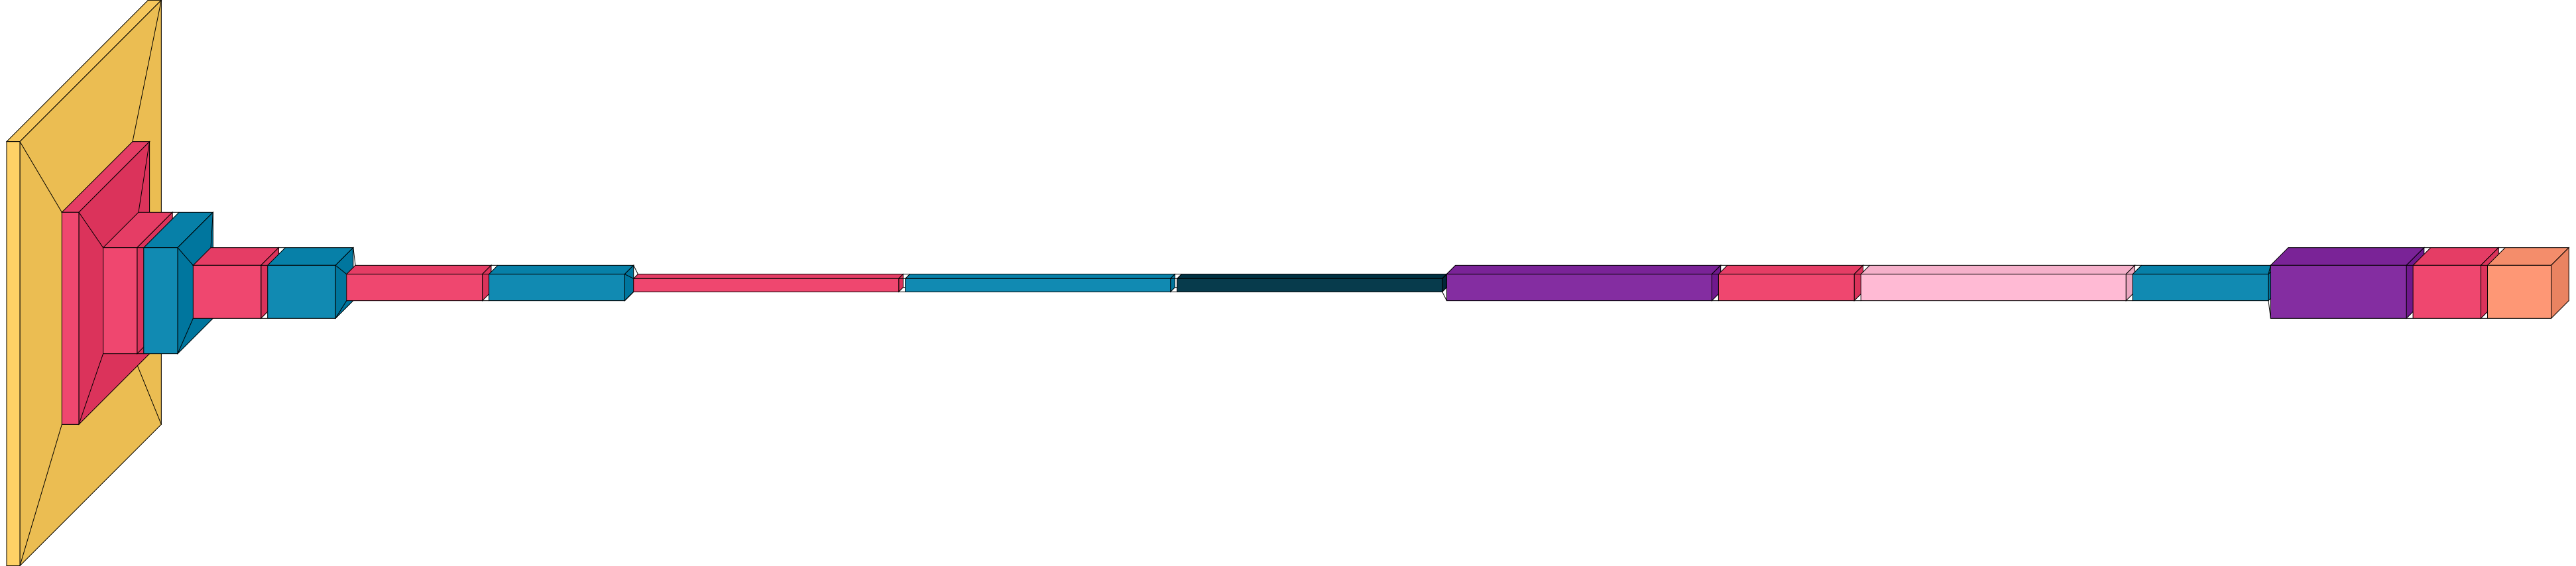

In [63]:
import visualkeras
from tensorflow.keras import layers
from PIL import ImageFont
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D
from collections import defaultdict

color_map = defaultdict(dict)
color_map[SPPF]['fill'] = 'black'
color_map[Conv]['fill'] = 'blue'
color_map[C2f]['fill'] = 'green'
color_map[ZeroPadding2D]['fill'] = 'gray'
color_map[Dropout]['fill'] = 'pink'
color_map[MaxPooling2D]['fill'] = 'red'
color_map[Dense]['fill'] = 'cyan'
color_map[Flatten]['fill'] = 'teal'

visualkeras.layered_view(model, scale_xy=1, scale_z=0.4)

In [70]:
# prompt: how to start tensorboard?

# Load the TensorBoard notebook extension
%reload_ext tensorboard

# Start TensorBoard
%tensorboard --logdir runs


Reusing TensorBoard on port 6006 (pid 46946), started 0:02:33 ago. (Use '!kill 46946' to kill it.)

<IPython.core.display.Javascript object>